In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
path = '/Users/Studium/Downloads/IMDB Dataset.csv'
df = pd.read_csv(path)
print(df['review'].head(20))
print(df.describe())

0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
3     Basically there's a family where a little boy ...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
9     If you like original gut wrenching laughter yo...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The cast played Shakespeare.<br /><br />Shakes...
14    This a fantastic movie of three prisoners who ...
15    Kind of drawn in by the erotic scenes, only to...
16    Some films just simply should not be remade. T...
17    This movie made it into one of my top 10 m

In [21]:
#Labels codieren
encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])


In [22]:
#Texte in numerische Werte umwandeln
vectorizer = TfidfVectorizer(max_features=5000)  # oder CountVectorizer
X = vectorizer.fit_transform(df['review']).toarray()

In [23]:
#Spaltung in Trainings- und Test-Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
#Erstellung eines neuronalen Netzwerkes mit Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')  # für Binary Classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/Studium/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,129 (1.22 MB)

 Trainable params: 320,129 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Training des Modells
history = model.fit(X_train, y_train, epochs=5, batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8401 - loss: 0.4193 - val_accuracy: 0.8973 - val_loss: 0.2494
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9139 - loss: 0.2176 - val_accuracy: 0.8939 - val_loss: 0.2546
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9225 - loss: 0.1990 - val_accuracy: 0.8902 - val_loss: 0.2660
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9258 - loss: 0.1904 - val_accuracy: 0.8839 - val_loss: 0.2776
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9330 - loss: 0.1768 - val_accuracy: 0.8844 - val_loss: 0.2892


In [26]:
#Bewertung der Accuracy und des Loss
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testgenauigkeit: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8859 - loss: 0.2914
Testgenauigkeit: 0.88


In [37]:
#Vorhersage des Modells
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5000
           1       0.86      0.92      0.89      5000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



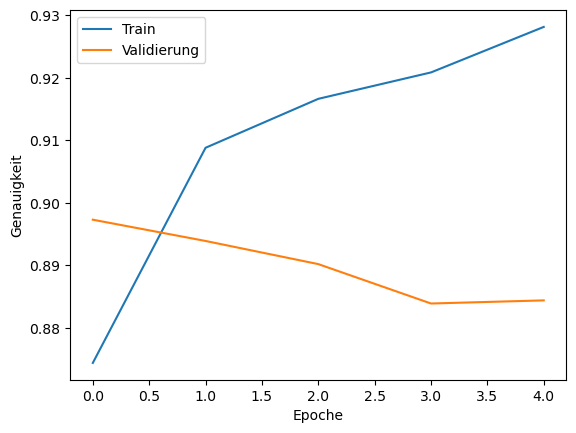

In [28]:
#Verhältnis von dem Trainings- und dem Testset bzgl. der Accuracy pro Epoche
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validierung')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()


<h3>Vergleich zu klassichen ML Modellen aus Scikit-learn</h3>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

In [30]:
#Initaliserung und Training des Klassifikationsmodells
model_c = LogisticRegression()
model_c.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Vorhersage Accuracy Score: 0.8929
Report anderer Metriken: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      4953
           1       0.90      0.89      0.89      5047

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



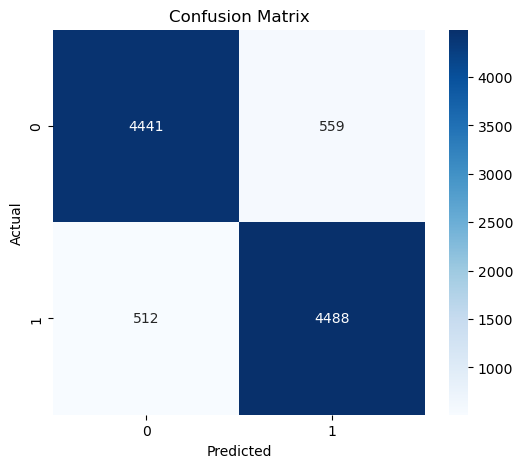

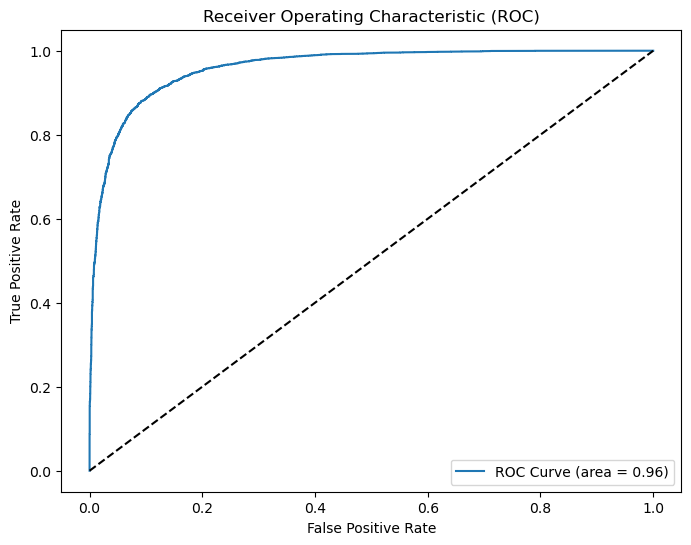

In [31]:
# Vorhersage unter Nutzung des Test-sets
y_pred = model_c.predict(X_test)

# Berechnung der Accuracy
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print('Vorhersage Accuracy Score:', acc)
print('Report anderer Metriken: \n', report)

# Erstellung und Visualisierung einer Konfusionsmatrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Erstellung einer Receiver Operating Characteristic (ROC) Kurve und des Area under curve(AUC) Wertes
y_prob = model_c.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


<h1>Abschlussbericht</h1>
Im Rahmen dieses Projekts wurde die Aufgabe bearbeitet, IMDb-Filmkritiken hinsichtlich ihrer Stimmung (positiv/negativ) automatisch zu klassifizieren. Ziel war es, den Einsatz eines einfachen neuronalen Netzes (Keras) mit dem eines klassischen Machine-Learning-Ansatzes (logistische Regression, scikit-learn) zu vergleichen. Die Umsetzung erfolgte mit folgenden Libraries:

- pandas für die Datenverwaltung

- scikit-learn für Datenaufteilung, Textvektorisierung (TfidfVectorizer), Label-Encoding und das ML-Modell

- TensorFlow/Keras für das neuronale Netz

- seaborn und matplotlib für Visualisierungen

<h3>Datenvorbereitung & Preprocessing</h3>

- Datenimport und Vorverarbeitung mit pandas

- Label-Encoding der Zielvariable (Stimmung)
  
- Text-Vektorisierung mit TF-IDF, um Textdaten in numerische Feature-Vektoren umzuwandeln
  
- Train-Test-Split mit stratifizierter Verteilung mittels scikit-learn

<h3>Modellarchitektur & Training</h3>
<h4>Neuronales Netz (Keras)</h4>

- Aufbau als Sequential-Modell mit zwei Dense-Schichten:
    
    Schicht: 64 Neuronen, Aktivierungsfunktion ReLU

    Schicht: 1 Neuron (Output), Aktivierungsfunktion Sigmoid

- Optimierer: Adam

- Verlust: Binary Crossentropy

- Training: 5 Epochen, Batch Size 

<h2>Vergleichsmodell: Logistische Regression (scikit-learn)</h2>

- Nutzung des Standards aus scikit-learn nach Datenvektorisierung.

- Kein tieferes Hyperparameter-Tuning durchgeführt.

<h3>Evaluation & Ergebnisse</h3>

<h4>Modell-Accuracy</h4>
Neuronales Netz (Keras)	0.8900 
<br>
Logistische Regression	0.8929

Beide Modelle erreichen eine fast identische, sehr gute Genauigkeit (~89%).

Die logistische Regression ist in diesem Szenario leicht besser, obwohl das neuronale Netz zusätzliche Freiheitsgrade besitzt.

<h3>Visualisierung</h3
                      
Zentrale Metrik war die Accuracy auf den Testdaten. Die Verläufe des Trainings (Keras) wurden über matplotlib dargestellt. Zusätzlich wurde die Verteilung der Vorhersageklassen mit seaborn visualisiert.

<h2>Fazit</h2>

- Interpretation: Klassische Modelle wie die logistische Regression bleiben bei Textklassifikation auf Basis von TF-IDF-Vektoren starke Baselines – oft sind sie auf kleineren bis mittelgroßen Datensätzen mindestens so leistungsfähig wie einfache neuronale Netze.

- Empfehlung: Für ähnliche Aufgaben empfiehlt sich ein Vergleich verschiedener Modellklassen, da aufwändige Deep-Learning-Modelle nicht immer automatisch zu besseren Ergebnissen führen.

- Weiterentwicklung: Der Einsatz fortgeschrittenerer Netzarchitekturen, Embeddings oder größerer Datensätze könnte das Potenzial neuronaler Netze besser ausschöpfen.

<b>Dieser Workflow und die Ergebnisse zeigen den gesamten Machine-Learning-Prozess von der Datenaufbereitung über Modellentwicklung bis zur Ergebnisbewertung in einer realitätsnahen, reproduzierbaren Pipeline.</b>